## Start with the following definitions

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

data = sm.datasets.co2.load_pandas()
y = data.data
y = y['co2'].resample('MS').mean()
y = y.fillna(y.bfill())

In [2]:
mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1))
mle = mod.fit()
y_res = mle.resid[-500:]

In [3]:
def cf2(series, lag_num=40):
    fig = plt.figure(figsize=(12,8))
    ax1, ax2 = fig.add_subplot(211), fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_acf(series, lags=lag_num, ax=ax1)
    fig = sm.graphics.tsa.plot_pacf(series, lags=lag_num, ax=ax2)

## Instruction 1

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


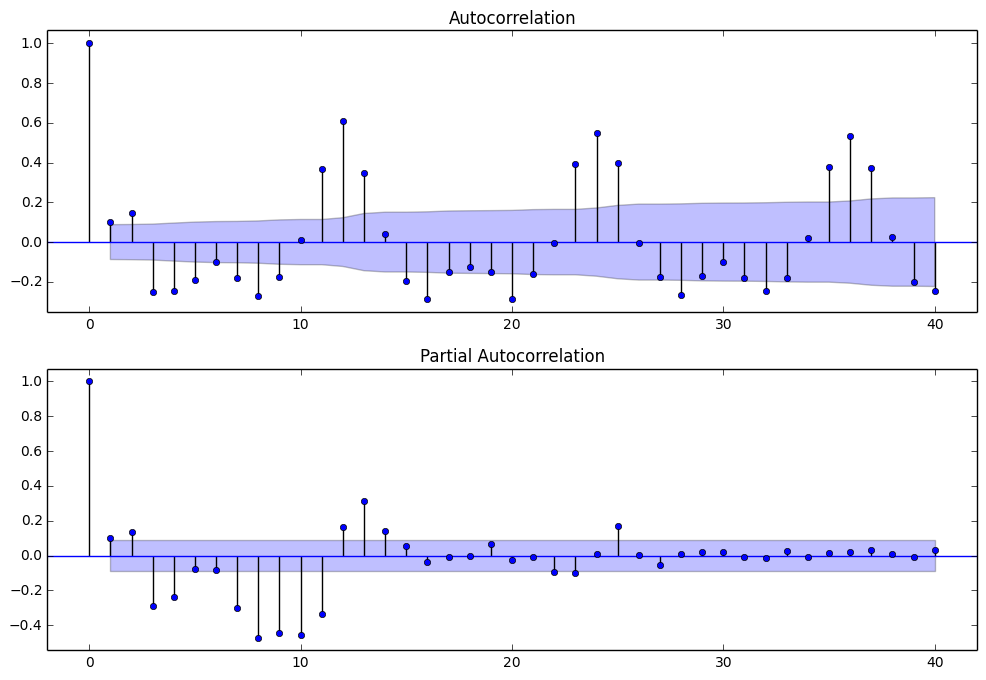

In [4]:
cf2(y_res)

## Instruction 2

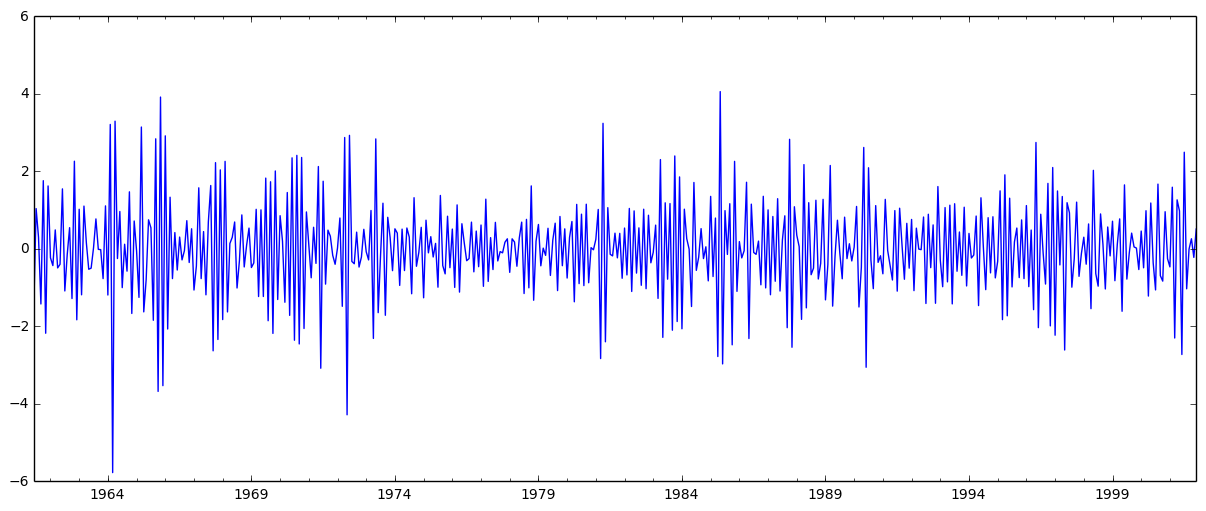

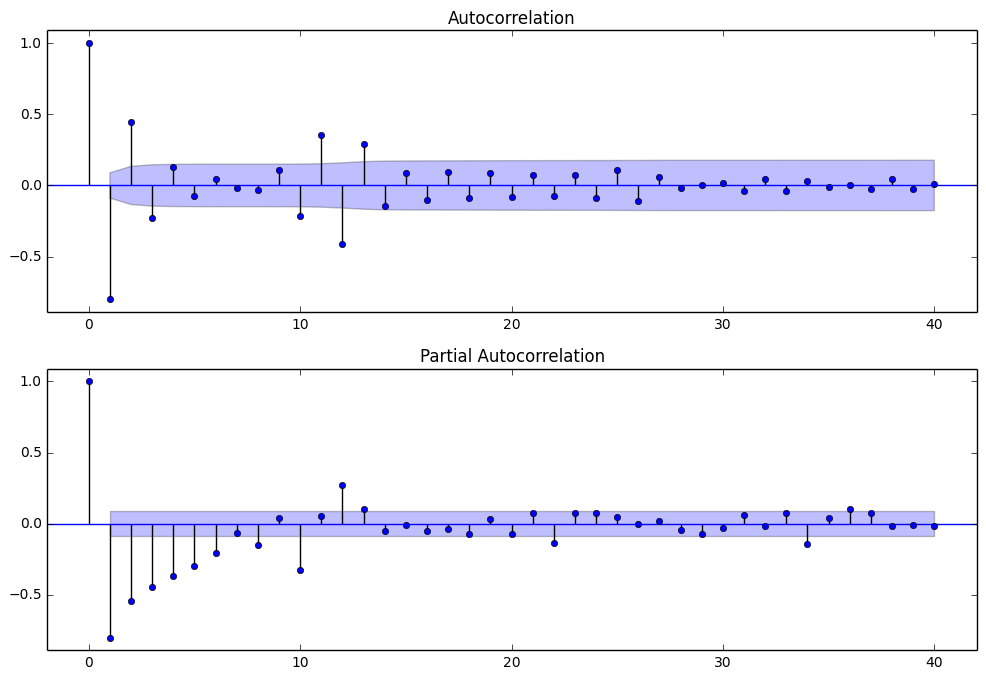

In [6]:
sdiff_res_12 = sm.tsa.statespace.tools.diff(y_res, k_seasonal_diff=1, k_seasons=12)
sdiff_res_12.plot(figsize=(15, 6))
plt.show()
cf2(sdiff_res_12)

## Instruction 3

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3985      0.086      4.647      0.000       0.230       0.567
ma.L1         -0.6997      0.070    -10.046      0.000      -0.836      -0.563
ar.S.L12       0.0196      0.053      0.369      0.712      -0.084       0.123
ma.S.L12      -0.8751      0.032    -27.654      0.000      -0.937      -0.813
sigma2         0.1080      0.005     21.675      0.000       0.098       0.118


/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != 'face':


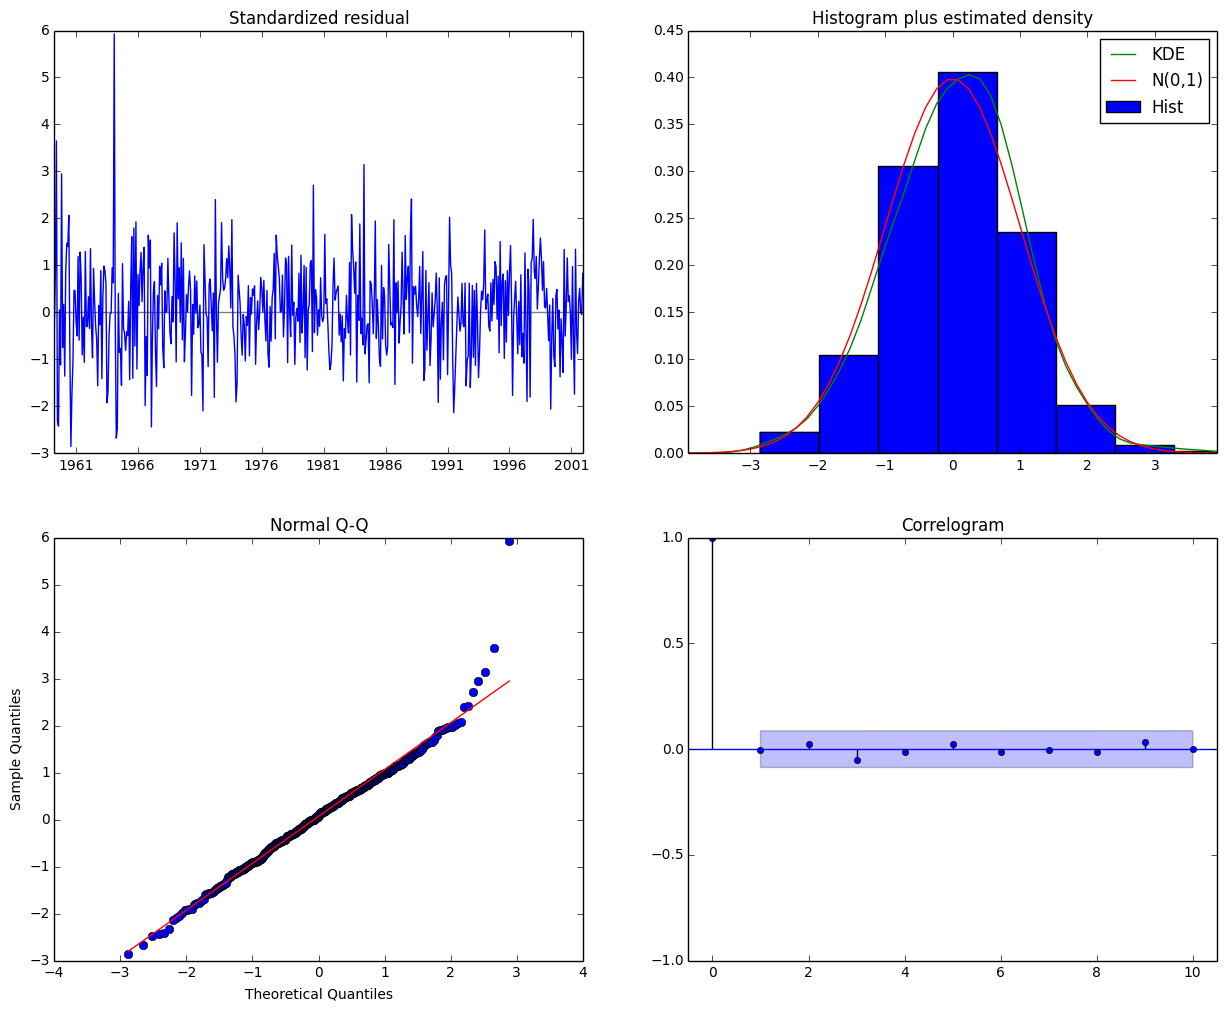

In [7]:
s_mod = sm.tsa.statespace.SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12))
s_mle = s_mod.fit()
s_res = s_mle.resid[-500:]
print(s_mle.summary().tables[1])
s_mle.plot_diagnostics(figsize=(15, 12))
plt.show()

## Instruction 4

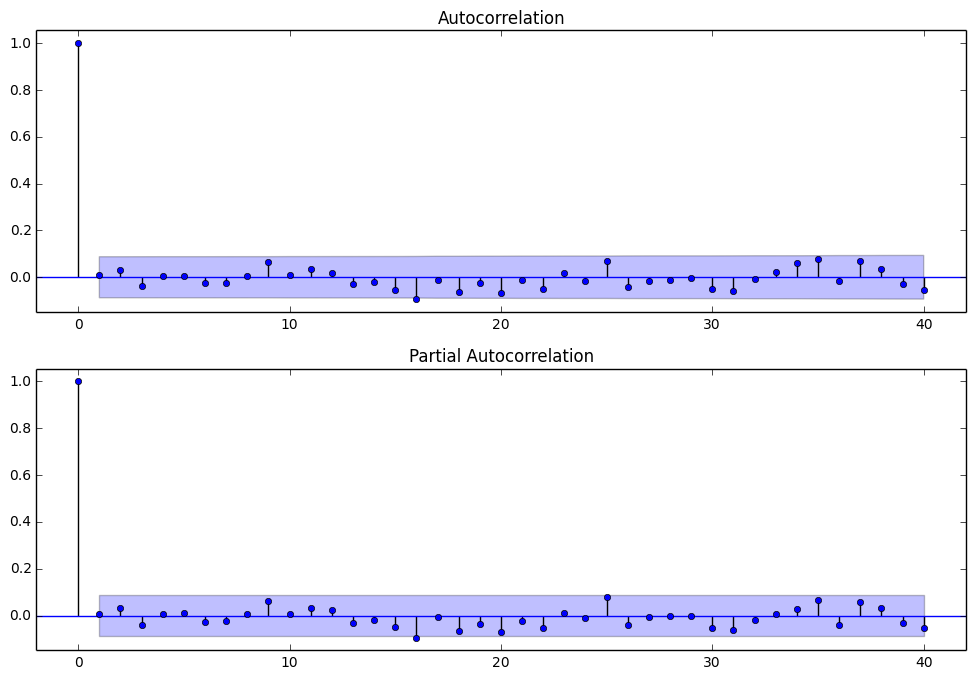

In [8]:
cf2(s_res)

## Instruction 5

In [9]:
print('ARIMA (1,1,1) - AIC:{}, SARIMA (1,1,1)x(1,1,1,12) - AIC:{}'.format(mle.aic, s_mle.aic))

ARIMA (1,1,1) - AIC:1267.20200705, SARIMA (1,1,1)x(1,1,1,12) - AIC:341.353547453
